<a href="https://colab.research.google.com/github/officialkalpesh3170/PyTorch/blob/main/Project/pojectANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#this project will contains datasets from minst fashion dataset.

#step-1 import all librarires

import pandas as pd
import torch
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset ,DataLoader


In [9]:
#set random seeds
torch.manual_seed(42)

In [10]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


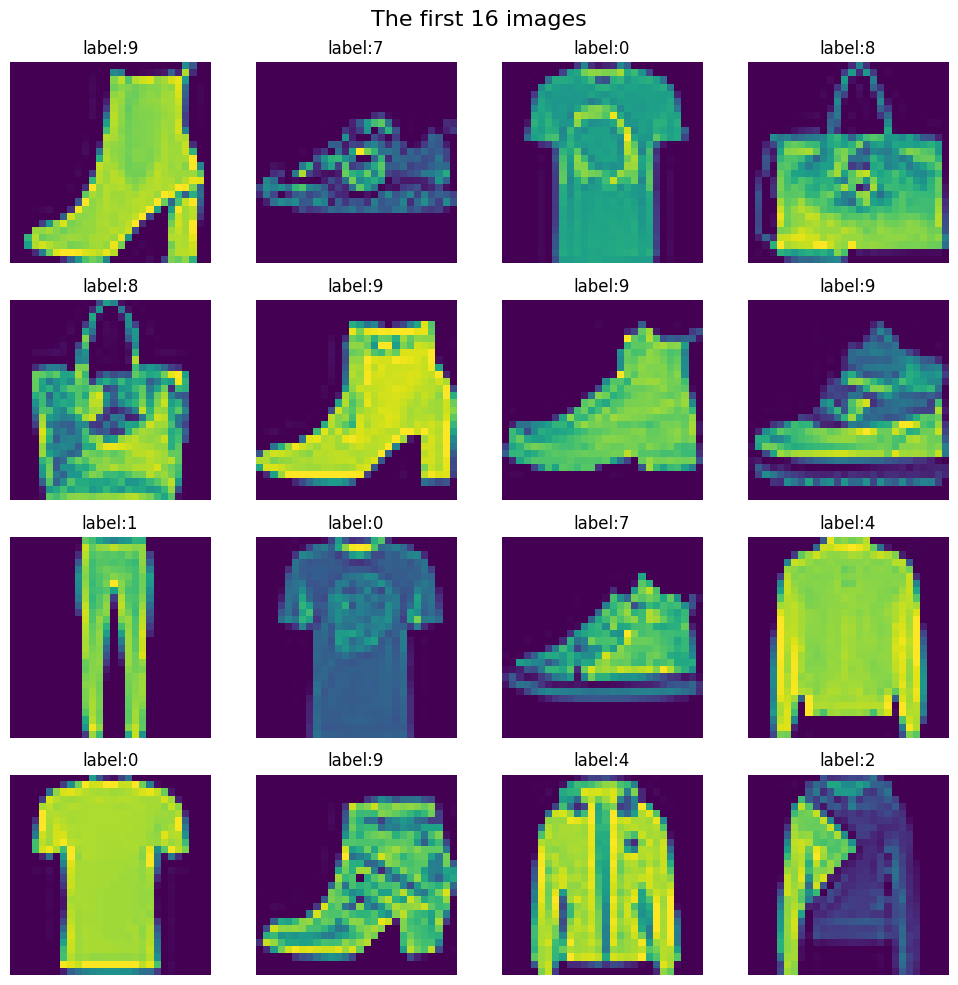

In [11]:
#create 4x4 grid of images part of data visualization

fig,axes =plt.subplots(4,4,figsize=(10,10))
fig.suptitle("The first 16 images",fontsize=16)


for i ,ax in enumerate(axes.flatten()):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f'label:{df.iloc[i,0]}')

plt.tight_layout()
plt.show()


In [12]:
X= df.iloc[:,1:].values
y=df.iloc[:,0].values

In [13]:
X

array([[  0,   0,   0, ..., 165,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [14]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train=X_train/255.0
X_test=X_test/255.0
#scaling the features

In [16]:
#create CustomDdataset
class CustomDataset(Dataset):

  def __init__(self,x,y):
    self.features=torch.tensor(x,dtype=torch.float32)
    self.labels=torch.tensor(y,dtype=torch.long)


  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [17]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [18]:
len(test_dataset)

1200

In [19]:
train_loader=DataLoader(train_dataset,batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [20]:
#define nn Class

class MyNN(nn.Module):
  def __init__(self,num_feature):

    super().__init__()
    self.model =nn.Sequential(
        nn.Linear(num_feature,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10),

    )

  def forward(self,x):
    return self.model(x)

In [21]:
#set learning rate and epochs

epochs=100
lr=0.1

In [22]:
#intiating

model=MyNN(X_train.shape[1])

# loss function

loss1 =nn.CrossEntropyLoss()

#optimizer

optimizer =optim.SGD(model.parameters(),lr=lr)

In [23]:
#trainig loop

for epoch in range(epochs):
  t=0

  for batch_features,batch_lables in train_loader:
    output=model(batch_features)

    #calculate loss
    loss=loss1(output,batch_lables)

    #backwardpass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    t=t+loss.item()

  avg_loss=t/len(train_loader)
  print(f'epoch:{epoch+1}/{epochs},loss:{avg_loss:.4f}')


epoch:1/100,loss:1.3216
epoch:2/100,loss:0.7793
epoch:3/100,loss:0.6428
epoch:4/100,loss:0.5752
epoch:5/100,loss:0.5282
epoch:6/100,loss:0.4953
epoch:7/100,loss:0.4602
epoch:8/100,loss:0.4359
epoch:9/100,loss:0.4183
epoch:10/100,loss:0.3984
epoch:11/100,loss:0.3850
epoch:12/100,loss:0.3723
epoch:13/100,loss:0.3477
epoch:14/100,loss:0.3467
epoch:15/100,loss:0.3139
epoch:16/100,loss:0.3126
epoch:17/100,loss:0.2955
epoch:18/100,loss:0.2857
epoch:19/100,loss:0.2708
epoch:20/100,loss:0.2624
epoch:21/100,loss:0.2576
epoch:22/100,loss:0.2423
epoch:23/100,loss:0.2396
epoch:24/100,loss:0.2261
epoch:25/100,loss:0.2234
epoch:26/100,loss:0.2117
epoch:27/100,loss:0.2191
epoch:28/100,loss:0.2110
epoch:29/100,loss:0.1816
epoch:30/100,loss:0.1889
epoch:31/100,loss:0.1912
epoch:32/100,loss:0.1915
epoch:33/100,loss:0.1759
epoch:34/100,loss:0.1779
epoch:35/100,loss:0.1577
epoch:36/100,loss:0.1668
epoch:37/100,loss:0.1553
epoch:38/100,loss:0.1443
epoch:39/100,loss:0.1442
epoch:40/100,loss:0.1329
epoch:41/

In [24]:
# set model to eval mode

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
#evaluation code

total=0
correct=0

with torch.no_grad():

  for batch_features,batch_lables in test_loader:

    outputs=model(batch_features)
    _, predicted =torch.max(outputs,1)

    total=total +batch_lables.shape[0]

    correct =correct + (predicted==batch_lables).sum().item()

accuracy=correct/total
print(f'accuracy:{accuracy*100:.2f}%')

accuracy:83.25%
